#  Decision Trees

## Load Dataset

In [1]:
import pandas as pd 

In [2]:
df_customers =  pd.read_csv('./mortgage_fund.csv')
df_customers.head()

,Funded,Rate,Competitor_Rate,Date,Amount,Location,Risk_Score,Number_of_Products,Customer_Segment
0,0,5.61,2.00,2012-05-05,636419,23,739,2,C18
1,0,6.00,4.30,2013-01-09,100354,46,706,3,C3
2,0,6.40,4.88,2012-05-31,844255,6,681,5,C22
3,0,4.75,2.16,2010-01-29,216031,13,662,5,C4
4,1,4.93,6.38,2010-09-01,551685,48,708,4,C15


## Pre-Processing 

In [3]:
import datetime as dt
from sklearn.preprocessing import LabelEncoder
#Convert sting to datetime
df_customers["Date"  ] =  pd.to_datetime(df_customers["Date"], format='%Y-%m-%d')
df_customers['Date']=df_customers['Date'].map(dt.datetime.toordinal)

#Covert 	Customer_Segment to numerical values
# Since Customer_segment is ordinal, we can use LableEncoder instead of using one-hot encoding to give integer 
# type lables for each category
le = LabelEncoder()
le.fit(df_customers["Customer_Segment"])
df_customers["Customer_Segment"] =  le.transform(df_customers["Customer_Segment"])
df_customers.head()

,Funded,Rate,Competitor_Rate,Date,Amount,Location,Risk_Score,Number_of_Products,Customer_Segment
0,0,5.61,2.00,734628,636419,23,739,2,14
1,0,6.00,4.30,734877,100354,46,706,3,27
2,0,6.40,4.88,734654,844255,6,681,5,19
3,0,4.75,2.16,733801,216031,13,662,5,38
4,1,4.93,6.38,734016,551685,48,708,4,11


In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112612 entries, 0 to 112611
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Funded              112612 non-null  int64  
 1   Rate                112612 non-null  float64
 2   Competitor_Rate     112612 non-null  float64
 3   Date                112612 non-null  int64  
 4   Amount              112612 non-null  int64  
 5   Location            112612 non-null  int64  
 6   Risk_Score          112612 non-null  int64  
 7   Number_of_Products  112612 non-null  int64  
 8   Customer_Segment    112612 non-null  int32  
dtypes: float64(2), int32(1), int64(6)
memory usage: 7.3 MB


In [5]:
df_customers.describe()

,Funded,Rate,Competitor_Rate,Date,Amount,Location,Risk_Score,Number_of_Products,Customer_Segment
count,112612.000000,112612.000000,112612.000000,112612.000000,1.126120e+05,112612.000000,112612.000000,112612.000000,112612.000000
mean,0.309780,4.351941,2.990703,734688.014696,2.969229e+05,25.468840,686.677379,3.314105,30.438186
std,0.462405,2.006630,1.980684,950.215856,2.937047e+05,14.422706,45.557917,1.483860,26.258820
min,0.000000,0.500000,-2.200000,733042.000000,0.000000e+00,1.000000,600.000000,1.000000,0.000000
25%,0.000000,2.760000,1.430000,733869.000000,8.223300e+04,13.000000,651.000000,2.000000,10.000000
50%,0.000000,4.080000,2.790000,734687.000000,2.032930e+05,25.000000,688.000000,3.000000,23.000000
75%,1.000000,5.890000,4.320000,735513.000000,4.158572e+05,38.000000,724.000000,5.000000,49.000000
max,1.000000,8.500000,12.800000,736330.000000,2.057581e+06,50.000000,780.000000,6.000000,102.000000


# # Split the data into Train and Test sets 

In [6]:
# Split the data into train and test datasets
from sklearn.model_selection import train_test_split

y = df_customers.Funded
X  = df_customers.drop("Funded", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1 )

print(f"Train Size = {X_train.shape}")
print(f"Test Size = {X_test.shape}")
print( df_customers.shape[0] == (X_train.shape[0] +  X_test.shape[0]))

Train Size = (78828, 8)
Test Size = (33784, 8)
True


# Building model and Evaluation

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import tree

# Create a decision Tree model and train it
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

# use the trained model to predict
predict =  model.predict(X_test)

#Evaluation
print(classification_report(y_true = y_test, y_pred= predict))



              precision    recall  f1-score   support

           0       0.85      0.98      0.91     23307
           1       0.93      0.63      0.75     10477

    accuracy                           0.87     33784
   macro avg       0.89      0.80      0.83     33784
weighted avg       0.88      0.87      0.86     33784



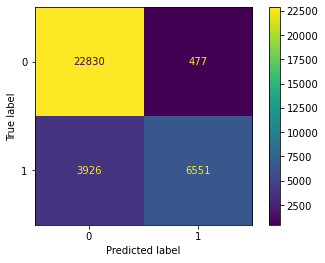

In [9]:
plot_confusion_matrix(model,X_test, y_test)

In [10]:
# Some information about the trained DT

print("Depth of the trained tree : {}".format(model.get_depth()))
print("Number of leaves of the trained tree : {}".format(model.get_n_leaves()))

print("The decision path for a given input samples, the output shape is <index of the input sample, node number through out the path>")
print(model.decision_path(X_test.iloc[1:4]))

Depth of the trained tree : 5
Number of leaves of the trained tree : 8
The decision path for a given input samples, the output shape is <index of the input sample, node number through out the path>
  (0, 0)	1
  (0, 14)	1
  (1, 0)	1
  (1, 1)	1
  (1, 3)	1
  (1, 9)	1
  (1, 11)	1
  (1, 13)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 9)	1
  (2, 11)	1
  (2, 13)	1


In [11]:
print(tree.export_text(model))

|--- feature_0 <= 5.08
|   |--- feature_5 <= 644.50
|   |   |--- class: 0
|   |--- feature_5 >  644.50
|   |   |--- feature_1 <= 3.39
|   |   |   |--- feature_5 <= 750.50
|   |   |   |   |--- feature_6 <= 5.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  5.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  750.50
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  3.39
|   |   |   |--- feature_6 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  1.50
|   |   |   |   |--- feature_1 <= 4.12
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  4.12
|   |   |   |   |   |--- class: 1
|--- feature_0 >  5.08
|   |--- class: 0



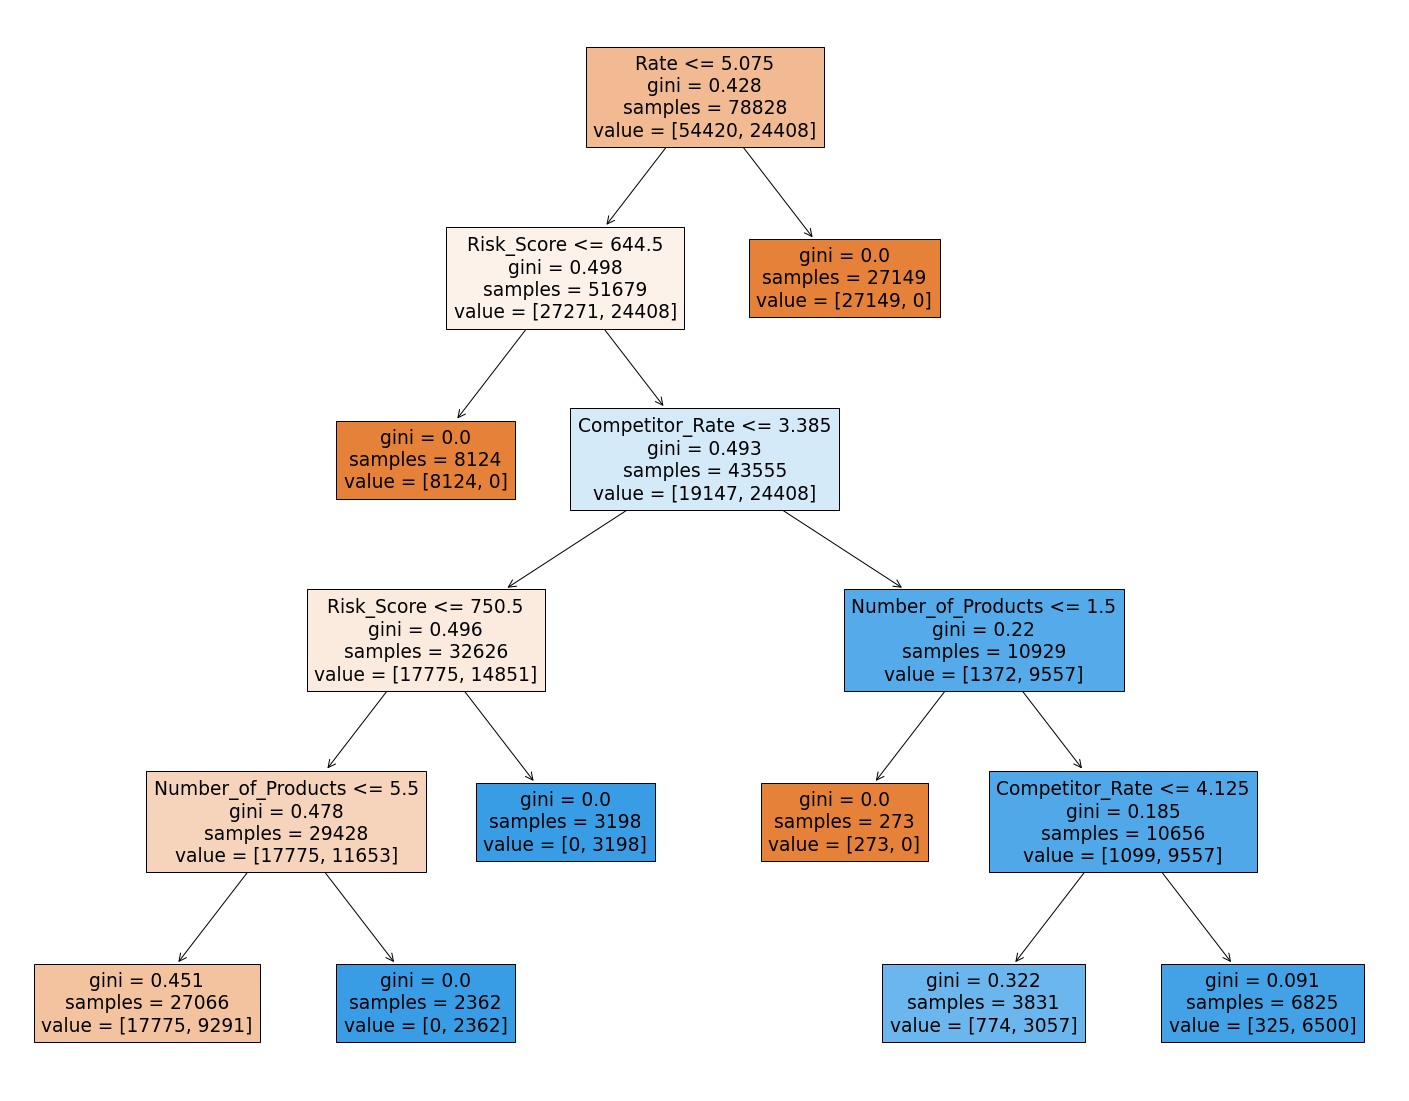

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,feature_names=df_customers.drop("Funded", axis=1).columns
,         
                   filled=True)

#### Visualize Decision Tree
More information for visualizing trees: 
https://mljar.com/blog/visualize-decision-tree/

### Important Parameteres for Decision Tree

- criterion{“gini”, “entropy”}: The function to measure the quality of a split.  default=”gini”.
- splitter{“best”, “random”} : The strategy used to choose the split at each node. default=”best”. 
- max_depth : the maximum depth of the tree. default=None.
- min_samples_split int or float (fraction of samples): The minimum number of samples required to split an internal node. default=2
- min_samples_leaf: The minimum number of samples required to be at a leaf node. default is 1.
- etc. 
for a complete list of parameters :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.decision_path

# Time Series
In this section some basic analytics method will be examine using python. the dataset can be achieved from Kaggle using the following link:

https://www.kaggle.com/podsyp/time-series-starter-dataset

![alt text](./Capture.png "Logo Title Text 1")


In [7]:
import numpy as np  
import pandas as pd  

#Loading the dataset and removing NaN values 
df_time_series = pd.read_csv('./Month_Value_1.csv')
df_time_series.head()
df_time_series.dropna(inplace=True)
df_time_series.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [8]:
#dataset info 
df_time_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    64 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.0+ KB


In [9]:
#Convert Period to datetime format
df_time_series['Period'] = pd.to_datetime(df_time_series['Period'], format="%d.%m.%Y")
df_time_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Period                                    64 non-null     datetime64[ns]
 1   Revenue                                   64 non-null     float64       
 2   Sales_quantity                            64 non-null     float64       
 3   Average_cost                              64 non-null     float64       
 4   The_average_annual_payroll_of_the_region  64 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.0 KB


In [10]:
df_time_series.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0


### Visualizing time series

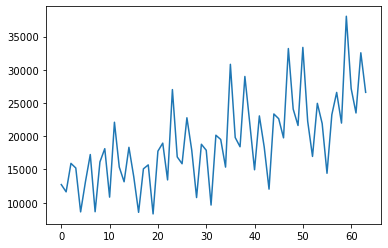

In [11]:
#plot the timeseries
import matplotlib.pyplot as plt

plt.plot(df_time_series.Sales_quantity)

###  Trend 
The above plot shows an upward trend in the time series. 
first we need to remove this trend.

<AxesSubplot:>

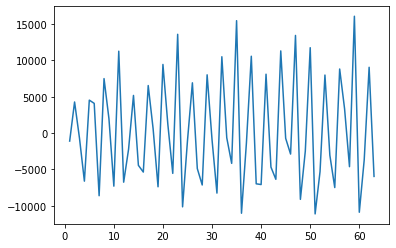

In [12]:
df_time_series['Sales_quantity_detrend'] = df_time_series['Sales_quantity'] - df_time_series['Sales_quantity'].shift(1)
df_time_series['Sales_quantity_detrend'].dropna(inplace=True)
df_time_series['Sales_quantity_detrend'].dropna().plot()

<AxesSubplot:>

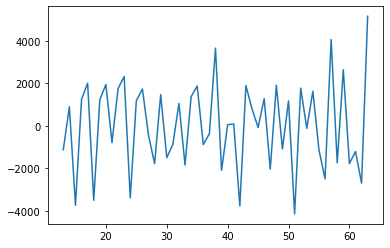

In [13]:
df_time_series['Sales_quantity_detrend_seasonality_removed'] = df_time_series['Sales_quantity_detrend'] - df_time_series['Sales_quantity_detrend'].shift(12)
df_time_series['Sales_quantity_detrend_seasonality_removed'].dropna(inplace=True)
df_time_series['Sales_quantity_detrend_seasonality_removed'].dropna().plot()

<AxesSubplot:>

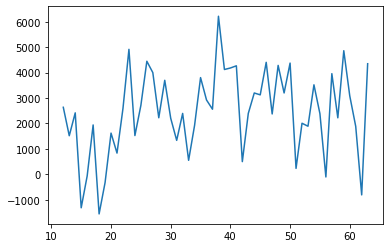

In [14]:
df_time_series['Sales_quantity_seasonality_removed'] = df_time_series['Sales_quantity'] - df_time_series['Sales_quantity'].shift(12)
df_time_series['Sales_quantity_seasonality_removed'].dropna(inplace=True)
df_time_series['Sales_quantity_seasonality_removed'].dropna().plot()

<ipython-input-15-fb2daa63acef>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


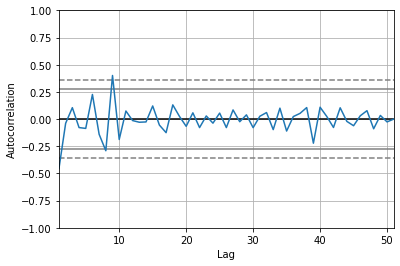

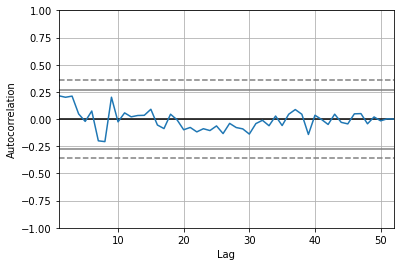

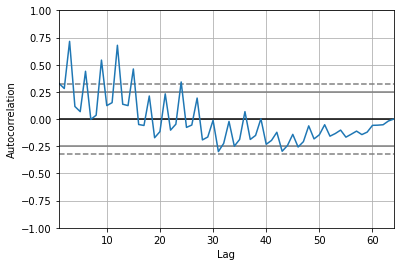

In [15]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
df_ts_sales_detrend_seas_removed=df_time_series[["Period","Sales_quantity_detrend_seasonality_removed"]].set_index("Period").dropna()
autocorrelation_plot(df_ts_sales_detrend_seas_removed)
pyplot.show()
df_ts_sales_seas_removed=df_time_series[["Period","Sales_quantity_seasonality_removed"]].set_index("Period").dropna()
autocorrelation_plot(df_ts_sales_seas_removed)
pyplot.show()
df_ts_sales=df_time_series[["Period","Sales_quantity"]].set_index("Period").dropna()
autocorrelation_plot(df_ts_sales)
pyplot.show()

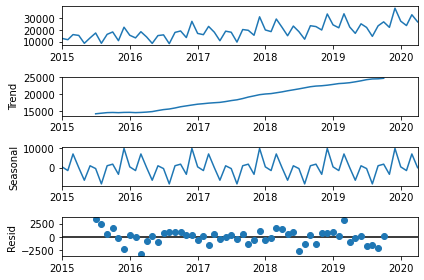

In [16]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(df_ts_sales,period=12,model="additive")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                           SARIMAX Results                                            
Dep. Variable:     Sales_quantity_detrend_seasonality_removed   No. Observations:                   51
Model:                                        ARIMA(10, 1, 0)   Log Likelihood                -437.940
Date:                                        Wed, 04 Aug 2021   AIC                            897.880
Time:                                                19:26:28   BIC                            918.912
Sample:                                            02-01-2016   HQIC                           905.889
                                                 - 04-01-2020                                         
Covariance Type:                                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4

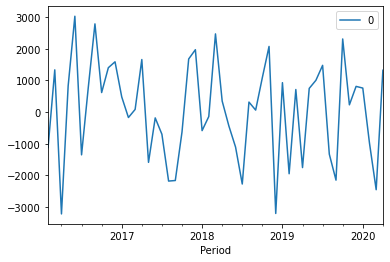

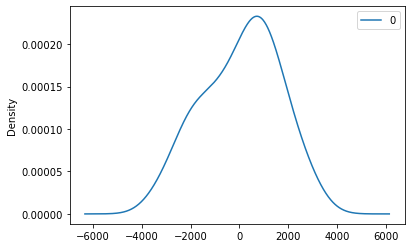

                 0
count    51.000000
mean     63.747975
std    1571.617166
min   -3217.801420
25%   -1112.174153
50%     316.708644
75%    1206.535603
max    3029.359969


In [89]:
#p = 10 because of the autocorellation 
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(df_ts_sales_detrend_seas_removed, order=(10,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=538.036578, expected=1280.000000
predicted=146.797355, expected=-2031.000000
predicted=-839.233373, expected=1910.000000
predicted=1066.945268, expected=-1084.000000
predicted=-472.518606, expected=1175.000000
predicted=459.274606, expected=-4143.000000
predicted=1701.630097, expected=1776.000000
predicted=-1289.262398, expected=-117.000000
predicted=-1054.343449, expected=1629.000000
predicted=-1316.427213, expected=-1134.000000
predicted=880.681752, expected=-2491.000000
predicted=56.004523, expected=4064.000000
predicted=-973.859216, expected=-1737.000000
predicted=-495.275507, expected=2640.000000
predicted=-55.621068, expected=-1774.000000
predicted=544.352415, expected=-1203.000000
predicted=1588.534128, expected=-2695.000000
predicted=2028.028570, expected=5160.000000
Test RMSE: 2603.367


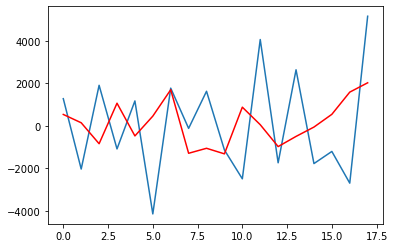

In [128]:
from sklearn.metrics import mean_squared_error

from math import sqrt
X = df_ts_sales_detrend_seas_removed.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### Imbalanced Dataset 

In [147]:
from sklearn.datasets import make_classification
from matplotlib import pyplot
from collections import Counter
# create the dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], random_state=1)

#Summarize Class Distribution
class_distribution =  Counter(y)
print(f"Distribution of classes for the datast: {class_distribution}")

Distribution of classes for the datast: Counter({0: 983, 1: 17})


In [127]:
# Lets assume the trained classifier always predict 0 or negative class for all input samples
predicted = [0] * 1000
print(classification_report(y, predicted))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       983
           1       0.00      0.00      0.00        17

    accuracy                           0.98      1000
   macro avg       0.49      0.50      0.50      1000
weighted avg       0.97      0.98      0.97      1000



In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=5 )
test_class_distribution =  Counter(y_test)
train_class_distribution =  Counter(y_train)

print(f"Class distribution for train set: {train_class_distribution}")
print(f"Class distribution for test set: {test_class_distribution}")

Class distribution for train set: Counter({0: 689, 1: 11})
Class distribution for test set: Counter({0: 294, 1: 6})


In [156]:
#Decision Tree 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=5 )

model = DecisionTreeClassifier(class_weight="balanced")
model.fit(X_train, y_train)

# use the trained model to predict
predict =  model.predict(X_test)

#Evaluation
print(classification_report(y_true = y_test, y_pred= predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       294
           1       1.00      0.17      0.29         6

    accuracy                           0.98       300
   macro avg       0.99      0.58      0.64       300
weighted avg       0.98      0.98      0.98       300



In [162]:
#conda install -c conda-forge imbalanced-learn

### Generate synthetic data using SMOTE

In [166]:
from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = SMOTE().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state=5 )

model = DecisionTreeClassifier(class_weight="balanced")
model.fit(X_train, y_train)

# use the trained model to predict
predict =  model.predict(X_test)

#Evaluation
print(classification_report(y_true = y_test, y_pred= predict))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       285
           1       0.85      0.85      0.85       305

    accuracy                           0.84       590
   macro avg       0.84      0.84      0.84       590
weighted avg       0.84      0.84      0.84       590



In [167]:
test_class_distribution =  Counter(y_test)
train_class_distribution =  Counter(y_train)

print(f"Class distribution for train set: {train_class_distribution}")
print(f"Class distribution for test set: {test_class_distribution}")

Class distribution for train set: Counter({0: 698, 1: 678})
Class distribution for test set: Counter({1: 305, 0: 285})
